## Name Entity Recognition

In the first notebook, we introduced the concept of POS tagging.

In general, Parts of Speech tagging (also known as POS) and named entities are valuable clues to sentence structure and meaning.

Knowing whether a word is a noun or a verb tells us about likely neighboring words (nouns in English are preceded by determiners and adjectives, verbs by nouns) and syntactic structure (verbs have dependency links to nouns), making. Part-of-speech tagging, a vital element of parsing, holds significant importance in the field of natural language processing.

Another proper tagging is related to emphasizing names to give a more relevant set of information:

**Named entity recognition (NER)**

Named entity recognition (NER), assigning words or phrases tags like PERSON, LOCATION, ORGANIZATION, …

This notebook will show how to perform tokenization, stop-word filtering, POS tagging, and NER using SpaCy. Also, word frequency and word vector representation will be of interest.



# SpaCy

Like NLTK, Spacy is an open-source Natural Language Processing Python library for text processing and analysis. It provides tools for various NLP tasks, such is tokenization, POS tagging, NER, dependency parsing, etc.

In [1]:
import spacy

## Convert text to lower case:

In [7]:
# loading pre-trained nlp model for the English language
# loading that model several components of the NLP pipline are available
# tokenizer, tagger (POS), parser, NER, lemmatizer, dates, etc.
try:
    nlp = spacy.load('en_core_web_sm')
except:
    # install english language model
    !python -m spacy download en
    nlp = spacy.load('en_core_web_sm')

In [5]:
text = "Vienna is the national capital, largest city, and one of nine states of Austria. Vienna is Austria's most populous city, with about 1.9 million inhabitants"

lower_text = text.lower()
cf_text = text.casefold()
print(lower_text)
print(cf_text)
print(lower_text==cf_text)

# use casefold for robust case folding when you have international special characters in the input text

vienna is the national capital, largest city, and one of nine states of austria. vienna is austria's most populous city, with about 1.9 million inhabitants
vienna is the national capital, largest city, and one of nine states of austria. vienna is austria's most populous city, with about 1.9 million inhabitants
True


## Word Tokenize
Tokenize sentences to get the tokens of the text i.e breaking the sentences into words.

In [14]:
doc = nlp(text)
words = [token.text for token in doc]
print (words)

['Vienna', 'is', 'the', 'national', 'capital', ',', 'largest', 'city', ',', 'and', 'one', 'of', 'nine', 'states', 'of', 'Austria', '.', 'Vienna', 'is', 'Austria', "'s", 'most', 'populous', 'city', ',', 'with', 'about', '1.9', 'million', 'inhabitants']


## Sentence tokenize
Tokenize sentences if the there are more than 1 sentence i.e breaking the sentences to list of sentence.

In [15]:
print(f"Type of the doc object: {type(doc)}")
print(doc.sents)
list(doc.sents)

Type of the doc object: <class 'spacy.tokens.doc.Doc'>


[Vienna is the national capital, largest city, and one of nine states of Austria.,
 Vienna is Austria's most populous city, with about 1.9 million inhabitants]

## Stop-Word removal
Remove irrelevant words using nltk stop words like is,the,a etc from the sentences as they don’t carry any information.

In [24]:
sample_text = """
On Education
Albert Einstein
Excerpts from an address by Albert Einstein to the State University of New York at
Albany, on the occasion of the celebration of the tercentenary of higher education in
America, 15th October, 1936. Reference - “Ideas and Opinions” by Albert Einstein
A day of celebration generally is in the first place dedicated to retrospect, especially
to the memory of personages who have gained special distinction for the development of the cultural life. This friendly service for our predecessors must indeed not
be neglected, particularly as such a memory of the best of the past is proper to
simulate the well-disposed of today to a courageous effort. But this should be done
by someone who, from his youth, has been connected with this State and is familiar
with its past, not by one who like a gypsy has wondered about and gathered his
experiences in all kinds of countries.
Thus, there is nothing else left for me but to speak about such questions as, independently of space and time, always have been and will be connected with educational
matters. In this attempt I cannot lay any claim to being an authority, especially as
intelligent and well-meaning men of all times have dealt with educational problems
and have certainly repeatedly expressed their view clearly about these matters.
From what source shall I, as a partial layman in the realm of pedagogy, derive
courage to expound opinions with no foundations except personal experience and
personal conviction? If it were really a scientific matter, one would probably be
tempted to silence by such considerations.
However, with the affairs of active human beings it is different. Here, knowledge
of truth alone does not suffice; on the contrary this knowledge must continually
be renewed by ceaseless effort, if it is not be lost. It resembles a statue of marble which stands in the desert and is continually threatened with burial by the
shifting sand. The hands of service must ever be at work, in order that the marble
continue lastingly to shine in the sun. To these serving hands mine shall also belong.
The school has always been the most important means of transferring the wealth
of tradition from one generation to the next. This applies today in an even higher
degree than in former times, for through modern development of the economic life,
the family as bearer of tradition and education has been weakened. The continuance and health of human society is therefore in a still higher degree dependent on
the school than formerly.
Sometimes one sees in the school simply the instrument for transferring a certain
maximum quantity of knowledge to the growing generation. But that’s not right.
Knowledge is dead; the school, however, serves the living. It should develop in the
young individuals those qualities and capabilities which are of value for the welfare of the Commonwealth. But that does not mean that individuality should be
destroyed and the individual becomes a mere tool of the community, like a bee or
an ant. A community of standardized individuals without personal originality and
personal aims would be a poor community with no scope for development. On the
1
contrary, the aim must be the training of independently acting and thinking individuals, who, however, see in the service of the community their highest life problem.
But how shall one try to attain this ideal? Should one perhaps try to realize this
aim by moralizing? Not at all. Words are and remain empty sound, and the road
to perdition1 has ever been accompanied by lip service to an ideal. But personalities are not formed by what is heard and said but by labor and activity. The
most important method of education accordingly always has consisted of the where
pupil was urged to actual performance. This applies as well to the first attempts
at writings of the primary boy as to the doctor’s thesis on graduation from the
university, or as to the mere memorizing of a poem, the writing of a composition,
the interpretation and translation of a text, the solving of a mathematical problem
or the practice of a physical sport.
But behind every achievement exists the motivation which is at the foundation of
it and which in turn is strengthened and nourished by the accomplishment of the
undertaking. Here there are the greatest differences and they are of greatest importance to the educational value of the school. The same work may owe its origin to
fear and compulsion, ambitious desire for authority and distinction, or loving interest in the object and a desire for truth and understanding, and thus to that divine
curiosity which every healthy child possesses, but which so often is weakened early.
The educational influence which is exercised upon the pupil by the accomplishment
of one and the same work may be widely different, depending upon whether fear
of hurt, egoistic passion, or desire for pleasure and satisfaction is at the bottom of
this work.
And nobody will maintain that the administration of the school and the attitude of
the teachers do not have an influence upon the molding of the psychological foundation for pupils. Give into the power of the teacher the fewest possible coercive
measures, so that the only source of the pupil’s respect for the teacher is the human
and intellectual qualities of the latter.
The second-named motive, ambition or, in milder terms, the aiming at recognition
and consideration, lies firmly fixed in human nature. With absence of mental stimulus of this kind, human cooperation would be entirely impossible; the desire for
approval of one’s fellow-man certainly is one of the most important binding powers
of society. In this complex feelings, constructive and destructive forces lie closely
together. Desire for approval and recognition is a healthy motive; but the desire to
be acknowledged as better, stronger, or more intelligent than a fellow being or fellow
scholar easily leads to an excessively egoistic psychological adjustment, which may
become injurious for the individual and for the community. Therefore the school
and the teacher must guard against employing the easy method of creating individual ambition, in order to induce the pupils to diligent work.
Darwin’s theory of the struggle for existence and the selectivity connected with it
has by many people been cited as authorization of the encouragement of the spirit of
competition. Some people also in such a way have tried to prove pseudo-scientifically
the necessity of the destructive economic struggle of competition between individuals. But this is wrong, because man owes his strength in the struggle for existence
to the fact that he is a socially living animal. As little as a battle between single
ants of an ant hill is essential for survival, just so little is this the case with the
"""

In [31]:
doc = nlp(sample_text)
# what is in doc - just first 15
for token in doc[:15]:
  print(f"token: {token} | type: {type(token)}")
#print tokens as text
tokens = [token.text for token in doc if token.text ]
print(f"All tokens before removal:\n{tokens}")
print("Total number of tokens before removal: ", len(tokens))
#remove stopwords, punctuations and new line characters using list comprehensions
fwords = [token.text for token in doc if token.is_stop != True and token.is_punct != True and token.text !="\n"]
print (f"Tokens after stop words removal:\n{fwords}")
print("Total number of tokens after removal: ", len(fwords))

token: 
 | type: <class 'spacy.tokens.token.Token'>
token: On | type: <class 'spacy.tokens.token.Token'>
token: Education | type: <class 'spacy.tokens.token.Token'>
token: 
 | type: <class 'spacy.tokens.token.Token'>
token: Albert | type: <class 'spacy.tokens.token.Token'>
token: Einstein | type: <class 'spacy.tokens.token.Token'>
token: 
 | type: <class 'spacy.tokens.token.Token'>
token: Excerpts | type: <class 'spacy.tokens.token.Token'>
token: from | type: <class 'spacy.tokens.token.Token'>
token: an | type: <class 'spacy.tokens.token.Token'>
token: address | type: <class 'spacy.tokens.token.Token'>
token: by | type: <class 'spacy.tokens.token.Token'>
token: Albert | type: <class 'spacy.tokens.token.Token'>
token: Einstein | type: <class 'spacy.tokens.token.Token'>
token: to | type: <class 'spacy.tokens.token.Token'>
All tokens before removal:
['\n', 'On', 'Education', '\n', 'Albert', 'Einstein', '\n', 'Excerpts', 'from', 'an', 'address', 'by', 'Albert', 'Einstein', 'to', 'the', 'St

## Get word frequency
counting the word occurrence using FreqDist library


['Education', 'Albert', 'Einstein', 'Excerpts', 'address', 'Albert', 'Einstein', 'State', 'University', 'New', 'York', 'Albany', 'occasion', 'celebration', 'tercentenary', 'higher', 'education', 'America', '15th', 'October', '1936', 'Reference', 'Ideas', 'Opinions', 'Albert', 'Einstein', 'day', 'celebration', 'generally', 'place', 'dedicated', 'retrospect', 'especially', 'memory', 'personages', 'gained', 'special', 'distinction', 'development', 'cultural', 'life', 'friendly', 'service', 'predecessors', 'neglected', 'particularly', 'memory', 'best', 'past', 'proper', 'simulate', 'disposed', 'today', 'courageous', 'effort', 'youth', 'connected', 'State', 'familiar', 'past', 'like', 'gypsy', 'wondered', 'gathered', 'experiences', 'kinds', 'countries', 'left', 'speak', 'questions', 'independently', 'space', 'time', 'connected', 'educational', 'matters', 'attempt', 'lay', 'claim', 'authority', 'especially', 'intelligent', 'meaning', 'men', 'times', 'dealt', 'educational', 'problems', 'certa

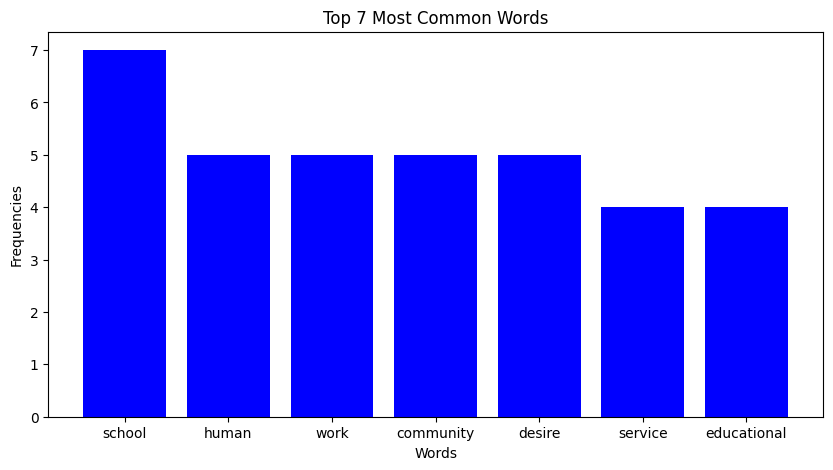

In [37]:
from collections import Counter
import matplotlib.pyplot as plt

# we are interested in filteres sample_text -> fwords

#remove stopwords and punctuations
print(fwords)
word_freq = Counter(fwords)
common_words = word_freq.most_common()
print (common_words)

# plot n most frequent
n = 7

# Separate words and frequencies for plotting
words, frequencies = zip(*common_words[:n])

# Plotting
plt.figure(figsize=(10, 5))
plt.bar(words, frequencies, color='blue')
plt.xlabel('Words')
plt.ylabel('Frequencies')
plt.title(f'Top {n} Most Common Words')
plt.show();

## Part of Speech tags
POS tag helps us to know the tags of each word like whether a word is noun, adjective etc.

In [39]:
text = "The dogs are barking outside. The cats are meowing in houses."

doc = nlp(text)

for tok in doc:
  print(f'{tok.text:{12}} {tok.pos_:{10}} {tok.tag_:{8}} {spacy.explain(tok.tag_)}')

The          DET        DT       determiner
dogs         NOUN       NNS      noun, plural
are          AUX        VBP      verb, non-3rd person singular present
barking      VERB       VBG      verb, gerund or present participle
outside      ADV        RB       adverb
.            PUNCT      .        punctuation mark, sentence closer
The          DET        DT       determiner
cats         NOUN       NNS      noun, plural
are          AUX        VBP      verb, non-3rd person singular present
meowing      VERB       VBG      verb, gerund or present participle
in           ADP        IN       conjunction, subordinating or preposition
houses       NOUN       NNS      noun, plural
.            PUNCT      .        punctuation mark, sentence closer


## NER(Named Entity Recognition)

| Label    | Description                                          |
|----------|------------------------------------------------------|
| ORG      | Companies, agencies, institutions.                   |
| GPE      | Geopolitical entity, i.e. countries, cities, states. |
| CARDINAL | Numerals                                             |

In [ ]:
text = "Vienna is the national capital, largest city, and one of nine states of Austria. Vienna is Austria's most populous city, with about 1.9 million inhabitants"
doc = nlp(text)

for ent in doc.ents:
    print(ent.text, ent.label_)

Vienna GPE
one CARDINAL
nine CARDINAL
Austria GPE
Vienna GPE
Austria GPE
about 1.9 million CARDINAL


## Word Vector Representation

In [ ]:
city = nlp('Vienna')
print(city.vector.shape)
print(city.vector)

(96,)
[-1.0961218  -0.22902218 -0.4975809   0.9610567   0.7078363  -0.06464957
  0.73181033  0.7445235  -1.2915039  -0.09090728  1.4697149   0.09945044
 -1.3506333  -0.13108441 -0.7924895   0.05922782 -0.6520083  -0.35899088
  1.2024351  -0.52779263 -1.159215    0.53939533 -0.6297082   0.14621311
  0.5931368   0.03357325  0.790095    1.5684465  -0.12552348  0.29643065
  0.02728534  0.15686297  0.8964345   1.0861708  -1.2775282  -1.2620009
  0.40376115  1.0572989   0.89938     1.5239228  -1.276994    0.15016714
 -0.30887002 -0.2136845  -0.39376312 -0.93562853 -1.3808439   1.8952878
  0.61209774 -0.47402984  0.4551257  -0.812488    0.03708351 -0.24509734
 -0.5069572  -0.9935806   1.3590736  -0.6163687   0.69572055  0.5491389
 -0.5353222  -0.9912694   0.37881336 -0.41703197  1.7358744  -0.02423835
  0.11495821 -0.94645905  0.63233984 -0.79578835  0.19647892  0.08197635
  1.4766746   0.03564269  0.7181915   0.0255273  -0.4215235  -0.5941889
 -0.82184887 -1.1261017  -0.02957836 -0.55367756 


> Now, you have an insight into the NLP mechanisms used in ChatBots.